In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [434]:
df = pd.read_csv("../Heart Disease/Aishah_Ismail_HeartDisease_data.csv")

In [435]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [436]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [437]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [438]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [439]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# EDA

In [440]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [441]:
df['sex']= df.sex.replace({1: "Male", 0: "Female"})

In [442]:
df['cp']= df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})

In [443]:
df['restecg']= df.restecg.replace({0: "normal", 1: "ST-T wave abnormality", 2:"left ventricular hypertrophy"})


In [444]:
df['fbs']= df.fbs.replace({0: "fasting blood sugar < 120 mg/dl", 1: "fasting blood sugar > 120 mg/dl"})

In [445]:
df['exang']= df.exang.replace({0: "no angina", 1: "no angina"})

In [446]:
df['slope']= df.slope.replace({0: "upsloping", 1: "flat", 2:"downsloping"})

In [447]:
df['thal']= df.thal.replace({3: "normal", 6: "fixed defect", 7:"reversible defect"})

In [448]:
df['sex']= df.sex.replace({1: "Male", 0: "Female"})

In [449]:
df['target']= df.target.replace({1: "High Risk", 0: "Low Risk"})

In [450]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymtomatic,145,233,fasting blood sugar > 120 mg/dl,normal,150,no angina,2.3,upsloping,0,1,High Risk
1,37,Male,non-anginal pain,130,250,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,187,no angina,3.5,upsloping,0,2,High Risk
2,41,Female,atypical_angina,130,204,fasting blood sugar < 120 mg/dl,normal,172,no angina,1.4,downsloping,0,2,High Risk
3,56,Male,atypical_angina,120,236,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,178,no angina,0.8,downsloping,0,2,High Risk
4,57,Female,typical_angina,120,354,fasting blood sugar < 120 mg/dl,ST-T wave abnormality,163,no angina,0.6,downsloping,0,2,High Risk


In [451]:
df['exang'].value_counts()

no angina    303
Name: exang, dtype: int64

In [452]:
df['thal'].value_counts()

2         166
normal    117
1          18
0           2
Name: thal, dtype: int64

## Plotting Results

## Categorical Attributes

In [453]:
df['target'].value_counts()

High Risk    165
Low Risk     138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

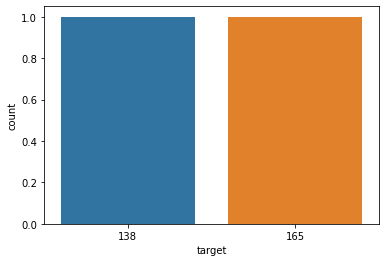

In [454]:
sns.countplot(data=df,x=df['target'].value_counts())

Text(0.5, 1.0, 'Heart Disease Classes')

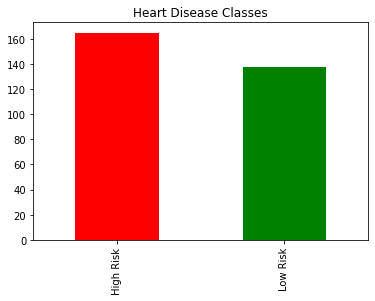

In [455]:
df['target'].value_counts().plot(kind='bar',color=('red','green')).set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Male/Female number in our dataset')

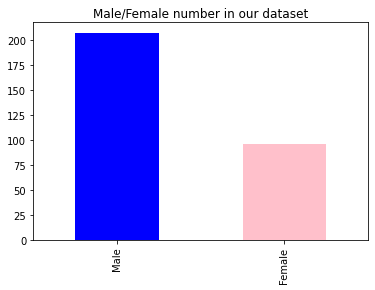

In [456]:
df['sex'].value_counts().plot(kind='bar', color=('blue','pink')).set_title('Male/Female number in our dataset')


Text(0.5, 1.0, 'Risk of Heart Disease according to Sex')

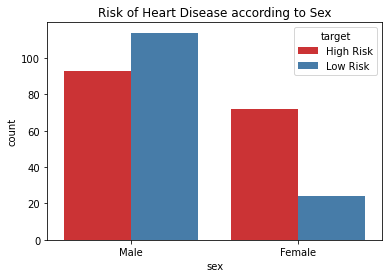

In [457]:
sns.countplot(x='sex', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to Sex')

Text(0.5, 1.0, 'Risk of Heart Disease according to Chest Pain')

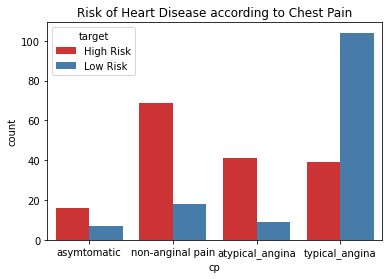

In [458]:
sns.countplot(x='cp', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to Chest Pain')

(array([0, 1]),
 [Text(0, 0, 'fasting blood sugar > 120 mg/dl'),
  Text(1, 0, 'fasting blood sugar < 120 mg/dl')])

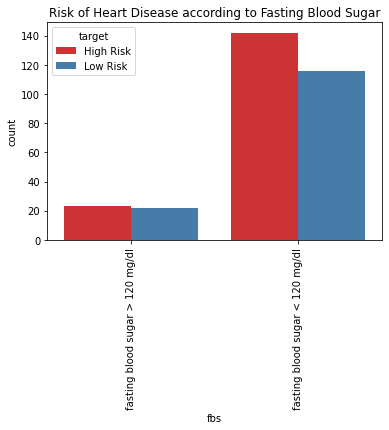

In [459]:
sns.countplot(x='fbs', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to Fasting Blood Sugar')
plt.xticks(rotation='vertical')

(array([0, 1, 2]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'ST-T wave abnormality'),
  Text(2, 0, 'left ventricular hypertrophy')])

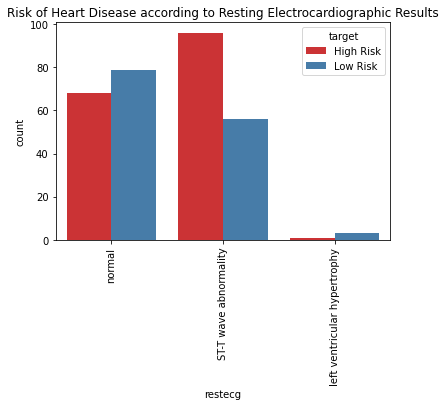

In [460]:
sns.countplot(x='restecg', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to Resting Electrocardiographic Results')
plt.xticks(rotation='vertical')

(array([0]), [Text(0, 0, 'no angina')])

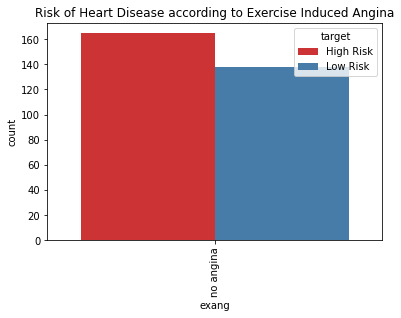

In [461]:
sns.countplot(x='exang', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to Exercise Induced Angina')
plt.xticks(rotation='vertical')

(array([0, 1, 2]),
 [Text(0, 0, 'upsloping'), Text(1, 0, 'downsloping'), Text(2, 0, 'flat')])

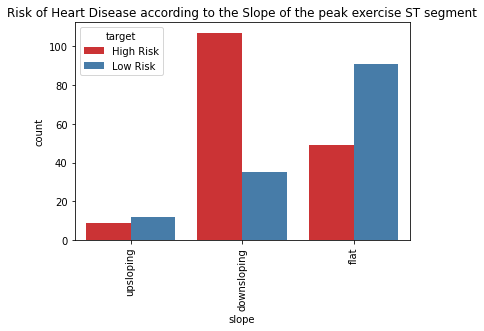

In [462]:
sns.countplot(x='slope', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to the Slope of the peak exercise ST segment')
plt.xticks(rotation='vertical')

In [463]:
df['slope'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: slope, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, 'normal'), Text(3, 0, '0')])

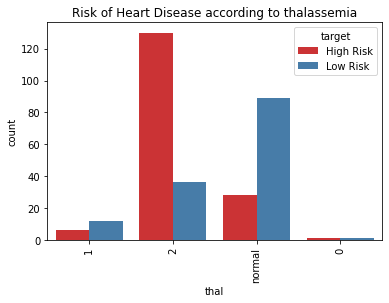

In [464]:
sns.countplot(x='thal', hue='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to thalassemia')
plt.xticks(rotation='vertical')

Text(0.5, 1.0, 'Risk of Heart Disease according to the number of major vessels (0-3) colored by flourosopy')

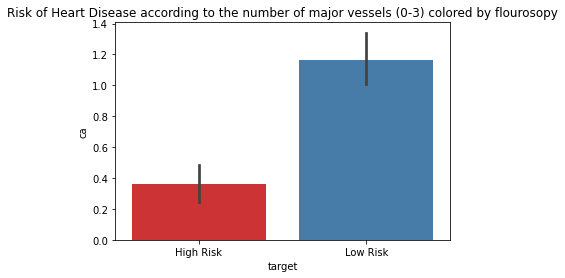

In [465]:
sns.barplot(x='target', y='ca',data=df, palette='Set1').set_title('Risk of Heart Disease according to the number of major vessels (0-3) colored by flourosopy')


Text(0.5, 1.0, 'Risk of Heart Disease according to the maximum heart rate achieved')

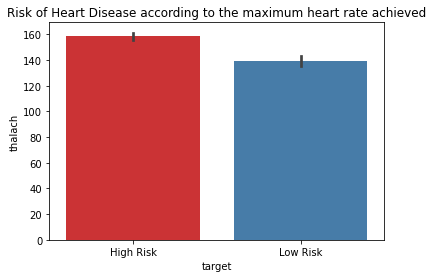

In [466]:
sns.barplot(x='target', y='thalach',data=df, palette='Set1').set_title('Risk of Heart Disease according to the maximum heart rate achieved')


## Quantitative Attributes

Text(0.5, 1.0, 'Risk of Heart Disease according to the resting blood pressure')

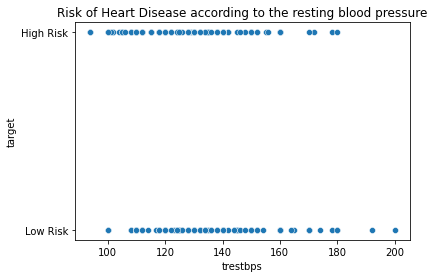

In [467]:
sns.scatterplot(x='trestbps', y='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to the resting blood pressure')


Text(0.5, 1.0, 'Risk of Heart Disease according to the serum cholestoral in mg/dl')

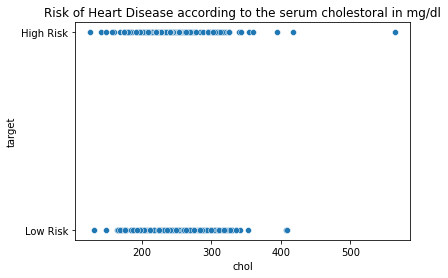

In [468]:
sns.scatterplot(x='chol', y='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to the serum cholestoral in mg/dl')


Text(0.5, 1.0, 'Risk of Heart Disease according to ST depression induced by exercise relative to rest')

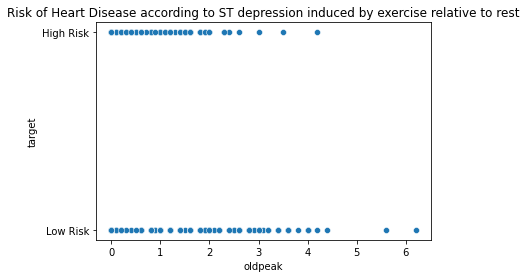

In [469]:
sns.scatterplot(x='oldpeak', y='target',data=df, palette='Set1').set_title('Risk of Heart Disease according to ST depression induced by exercise relative to rest')


## Plot All Attributes

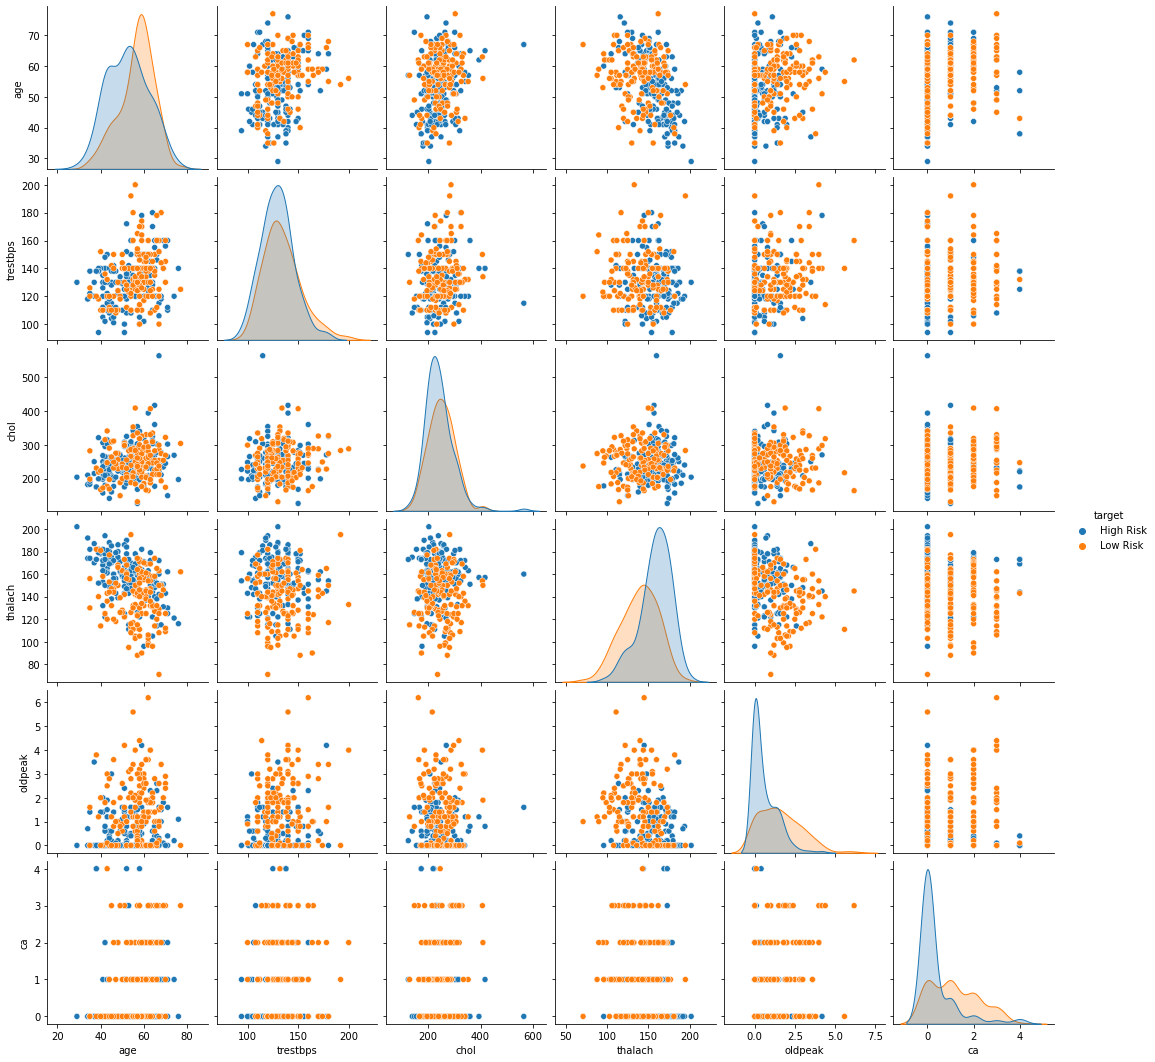

In [470]:
sns.pairplot(df,hue='target')

# MACHINE LEARNING

In [483]:
df = pd.read_csv("../Heart Disease/Aishah_Ismail_HeartDisease_data.csv")

In [484]:
X =df.drop(['target'],axis=1)


In [485]:
y=df['target']

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [488]:
#from sklearn.preprocessing import StandardScaler

In [489]:
#scaler = StandardScaler()

In [490]:
#scaled_X_train = scaler.fit_transform(X_train)
#scaled_X_test = scaler.transform(X_test)

In [491]:
from sklearn.metrics import plot_confusion_matrix,classification_report

RANDOM FOREST

In [492]:
from sklearn.ensemble import RandomForestClassifier

In [493]:
rf = RandomForestClassifier(n_estimators=10,max_features='auto',random_state=101)

In [494]:
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [495]:
rf.feature_importances_

array([0.07647828, 0.04548581, 0.16757829, 0.07212649, 0.11045153,
       0.00953785, 0.02058438, 0.11732284, 0.04783631, 0.09339946,
       0.04974685, 0.1122654 , 0.0771865 ])

In [496]:
importances_rf = pd.DataFrame(rf.feature_importances_)

In [497]:
importances_rf.info

<bound method DataFrame.info of            0
0   0.076478
1   0.045486
2   0.167578
3   0.072126
4   0.110452
5   0.009538
6   0.020584
7   0.117323
8   0.047836
9   0.093399
10  0.049747
11  0.112265
12  0.077187>

In [498]:
importances_rf

,0
0,0.076478
1,0.045486
2,0.167578
3,0.072126
4,0.110452
5,0.009538
6,0.020584
7,0.117323
8,0.047836
9,0.093399


In [499]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [500]:
features_importance_rf=pd.concat([pd.DataFrame(X.columns),importances_rf], axis=1)

In [501]:
features_importance_rf=features_importance_rf.set_axis(['features','importance_rf'],axis='columns')

In [502]:
features_importance_rf

,features,importance_rf
0,age,0.076478
1,sex,0.045486
2,cp,0.167578
3,trestbps,0.072126
4,chol,0.110452
5,fbs,0.009538
6,restecg,0.020584
7,thalach,0.117323
8,exang,0.047836
9,oldpeak,0.093399


In [503]:
features_importance_rf=features_importance_rf.drop(features_importance_rf.index[0], axis=0)

In [504]:
features_importance_rf.sort_values(by='importance_rf',ascending=False)

,features,importance_rf
2,cp,0.167578
7,thalach,0.117323
11,ca,0.112265
4,chol,0.110452
9,oldpeak,0.093399
12,thal,0.077187
3,trestbps,0.072126
10,slope,0.049747
8,exang,0.047836
1,sex,0.045486


In [505]:
preds_rf = rf.predict(X_test)

In [506]:
print(classification_report(preds_rf, y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        43
           1       0.79      0.77      0.78        48

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



C:\Users\setta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


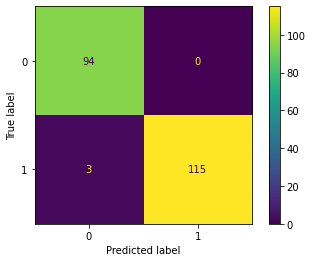

In [507]:
plot_confusion_matrix(rf,X_train,y_train)

GRADIENT BOOSTING

In [508]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
gb= GradientBoostingClassifier()

In [509]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [510]:
importances_gb=gb.feature_importances_

In [511]:
importances_gb = pd.DataFrame(gb.feature_importances_)

In [512]:
features_importance_gb=pd.concat([pd.DataFrame(X.columns),importances_gb], axis=1)

In [513]:
features_importance_gb=features_importance_gb.set_axis(['features','importance_gb'],axis='columns')

In [514]:
features_importance_gb=features_importance_gb.drop(features_importance_gb.index[0], axis=0)

In [515]:
features_importance_gb.sort_values(by='importance_gb',ascending=False)

,features,importance_gb
2,cp,0.280506
11,ca,0.128860
12,thal,0.116816
9,oldpeak,0.103671
3,trestbps,0.065223
4,chol,0.060586
7,thalach,0.051857
1,sex,0.043452
8,exang,0.043291
10,slope,0.026993


In [516]:
preds_gb = gb.predict(X_test)

In [517]:
print(classification_report(preds_gb, y_test))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        40
           1       0.87      0.80      0.84        51

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



C:\Users\setta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


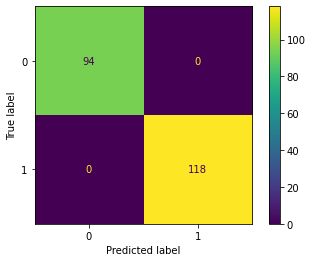

In [518]:
plot_confusion_matrix(gb,X_train,y_train)

Xg BOOST

In [519]:
from xgboost import XGBClassifier

In [520]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

C:\Users\setta\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [521]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [522]:
importances_xgb=xgb.feature_importances_

In [523]:
importances_xgb = pd.DataFrame(xgb.feature_importances_)

In [524]:
features_importance_xgb=pd.concat([pd.DataFrame(X.columns),importances_xgb], axis=1)

In [525]:
features_importance_xgb=features_importance_xgb.set_axis(['features','importance_xgb'],axis='columns')

In [526]:
features_importance_xgb=features_importance_xgb.drop(features_importance_xgb.index[0], axis=0)

In [527]:
features_importance_xgb.sort_values(by='importance_xgb',ascending=False)

,features,importance_xgb
2,cp,0.266873
12,thal,0.109048
8,exang,0.102219
11,ca,0.091959
5,fbs,0.085820
1,sex,0.079330
9,oldpeak,0.054472
10,slope,0.046751
7,thalach,0.031729
4,chol,0.030816


In [529]:
preds_xgb = xgb.predict(X_test)

In [530]:
print(classification_report(preds_xgb, y_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        38
           1       0.91      0.81      0.86        53

    accuracy                           0.85        91
   macro avg       0.84      0.85      0.84        91
weighted avg       0.86      0.85      0.85        91



C:\Users\setta\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


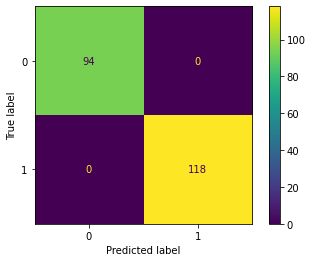

In [531]:
plot_confusion_matrix(xgb,X_train,y_train)

TOP 5 FEATURES IMPORTANCES OF (RF,GB,XGB)

In [532]:
features_importance_rf=features_importance_rf.head(5)

In [533]:
features_importance_gb=features_importance_gb.head(5)

In [534]:
features_importance_xgb=features_importance_xgb.head(5)

In [535]:

features_importances = pd.merge(features_importance_rf, features_importance_gb, on='features', how='outer')
features_importances = pd.merge(features_importances, features_importance_xgb, on='features', how='outer')

In [536]:
features_importances=features_importances.dropna()

In [537]:
features_importances

,features,importance_rf,importance_gb,importance_xgb
0,sex,0.045486,0.043452,0.079330
1,cp,0.167578,0.280506,0.266873
2,trestbps,0.072126,0.065223,0.030169
3,chol,0.110452,0.060586,0.030816
4,fbs,0.009538,0.005851,0.085820


In [538]:
features_importances=features_importances.set_index('features')

In [539]:
features_importances

,importance_rf,importance_gb,importance_xgb
features,,,
sex,0.045486,0.043452,0.079330
cp,0.167578,0.280506,0.266873
trestbps,0.072126,0.065223,0.030169
chol,0.110452,0.060586,0.030816
fbs,0.009538,0.005851,0.085820


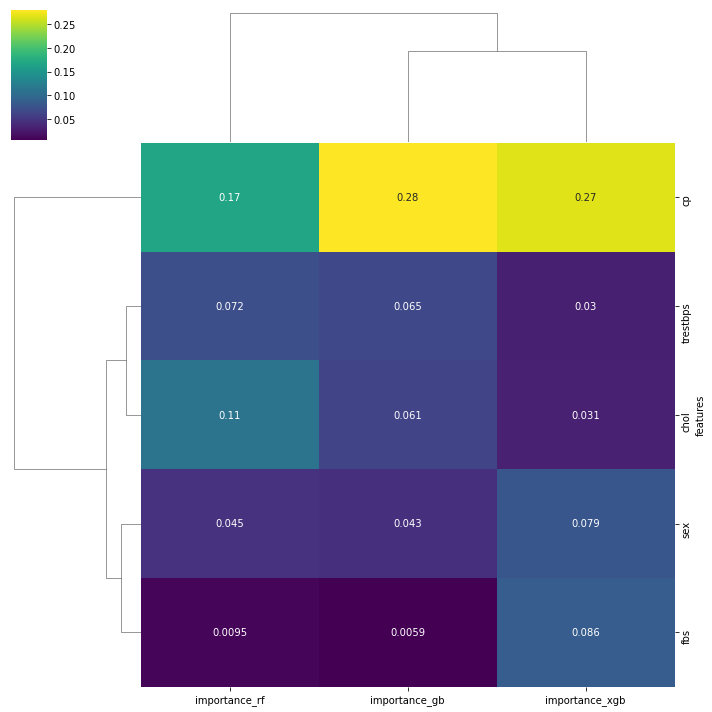

In [540]:
sns.clustermap(data=features_importances, cmap='viridis', annot=True)

In [541]:
features_importances.columns

Index(['importance_rf', 'importance_gb', 'importance_xgb'], dtype='object')

In [542]:
features_importances.index

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs'], dtype='object', name='features')

In [543]:
transpose_features_importances=features_importances.transpose()

<AxesSubplot:ylabel='features'>

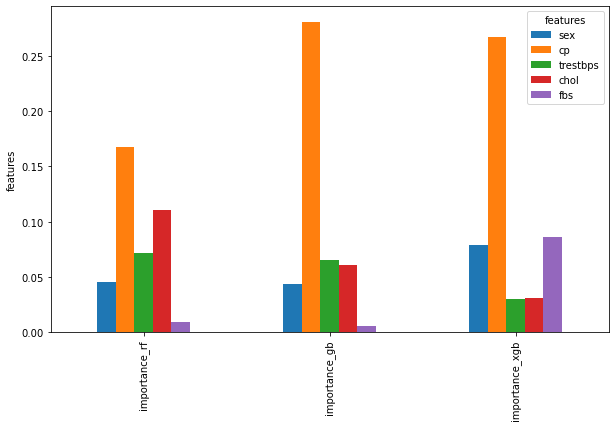

In [544]:
transpose_features_importances.plot(kind='bar', figsize=(10,6), ylabel='features')